In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd

In [2]:
df = pd.read_csv('Files/tmdb_movies.csv')
df.head(5)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [3]:
## Ad.1 - Zwróć listę 10 najwyżej ocenianych filmów (vote_average), 
## których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów
## DataFrame.quantile(q=0.5, axis=0, numeric_only=False, interpolation='linear', method='single')

In [4]:
vote_count_quantile = df['vote_count'].quantile(0.75)
top_voted_movies = df[df['vote_count'] > vote_count_quantile]

In [5]:
top_rated_movies = top_voted_movies.sort_values('vote_average', ascending=False)
top_ten_movies = top_rated_movies.head(10)
print(top_ten_movies[['original_title','vote_average','vote_count']])

                original_title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
2294                  千と千尋の神隠し           8.3        3840
3865                  Whiplash           8.3        4254
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
1818          Schindler's List           8.3        4329
662                 Fight Club           8.3        9413
2170                    Psycho           8.2        2320
1847                GoodFellas           8.2        3128


In [6]:
## Ad.2a - Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku
## dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie).

In [7]:
# Tworzenie nowej tabeli z indexem 'year'
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year.fillna(0).astype(int)  # usunięcie wartości dziesiętnej, "Cannot convert non-finite values"
movies_in_years = df[(df['year']>=2010)&(df['year']<=2016)]
movies_in_years[['budget','revenue','year']]

,budget,revenue,year
2,245000000,880674609,2015
3,250000000,1084939099,2012
4,260000000,284139100,2012
6,260000000,591794936,2010
7,280000000,1405403694,2015
...,...,...,...
4787,0,0,2011
4794,0,0,2012
4799,9000,0,2011
4800,0,0,2013


In [8]:
# Grupowanie po 'year' i usunięcie wartości w formacie 1e07 z użyciem applymap
grouped = movies_in_years[['budget','revenue','year']].groupby('year').mean('budget','revenue')
grouped[['budget', 'revenue']] = grouped[['budget', 'revenue']].applymap(lambda x: int(round(x)))
grouped

,budget,revenue
year,,
2010,34495411,90438110
2011,34772320,92004131
2012,34922032,116065915
2013,35523294,101348456
2014,30959888,101346599
2015,31132164,105439927
2016,45703269,139049586


In [9]:
## Ad.2b - dodanie wykesu: kolumnowy ('revenue') i liczbowy ('budget')

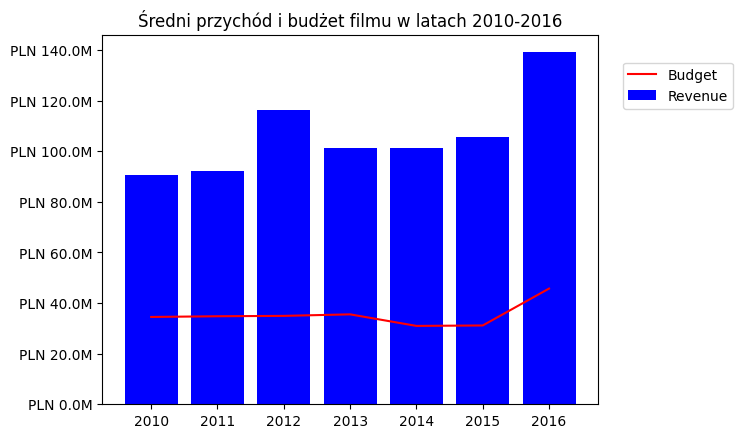

In [10]:
def million(x, pos):
    return 'PLN {:2.1f}M'.format(x*1e-6)

formatter = plt.FuncFormatter(million)

fig, axes = plt.subplots()

axes.bar(grouped.index, grouped['revenue'], color='blue', label='Revenue')
axes.plot(grouped.index, grouped['budget'], color='red', label='Budget')
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016')
axes.yaxis.set_major_formatter(formatter)

axes.legend(loc=(1.05,0.8))

plt.show()

In [11]:
## Ad.3 - Połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [12]:
df_genres = pd.read_csv('Files/tmdb_genres.csv')
df_genres = df_genres.rename(columns={'Unnamed: 0': 'genre_id'})  # kolumna na .csv była pusta
df_genres.head(5)

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [13]:
new_movies_df = pd.merge(df,df_genres,how='outer',on='genre_id').sort_values(by='id')
new_movies_df.head(5)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genres
4256,3766,4000000,NaN,5,en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,1995-12-09,4300000,98.0,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530,80.0,1995,Crime
1036,2912,11000000,http://www.starwars.com/films/star-wars-episod...,11,en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,1977-05-25,775398007,121.0,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,12.0,1977,Adventure
1240,328,94000000,http://movies.disney.com/finding-nemo,12,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,2003-05-30,940335536,100.0,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122,16.0,2003,Animation
2971,809,55000000,NaN,13,en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,1994-07-06,677945399,142.0,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927,35.0,1994,Comedy
1932,2516,15000000,http://www.dreamworks.com/ab/,14,en,American Beauty,"Lester Burnham, a depressed suburban father in...",80.878605,1999-09-15,356296601,122.0,Released,Look closer.,American Beauty,7.9,3313,18.0,1999,Drama


In [14]:
## Ad.4 - Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [15]:
genres_count = new_movies_df.groupby('genres').count()
new_genres_count = genres_count[['title']].sort_values(by='title', ascending=False)
new_genres_count.head()

,title
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300


In [16]:
first_genre = new_genres_count.index[0]
first_count = new_genres_count.loc[first_genre,'title']
print(f'Gatunek filmu, który pojawia się najczęściej, to: {first_genre}. Pojawia się na liście {first_count} razy')

Gatunek filmu, który pojawia się najczęściej, to: Drama. Pojawia się na liście 1207 razy


In [17]:
## Ad.5 - Filmy, którego gatunku trwają średnio najdłużej (runtime)

In [18]:
runtime_average = new_movies_df.groupby('genres').mean('runtime')
new_runtime_average = runtime_average[['runtime']].sort_values(by='runtime', ascending=False).round(1)
new_runtime_average.head()

,runtime
genres,
History,134.0
War,126.1
Western,117.9
Drama,115.5
Adventure,113.1


In [19]:
first_runtime_genre = new_runtime_average.index[0]
print(f'Gatunek filmu, który średnio trwa najdłużej to: {first_runtime_genre}')

Gatunek filmu, który średnio trwa najdłużej to: History


In [20]:
## Ad.6 - Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<Axes: >

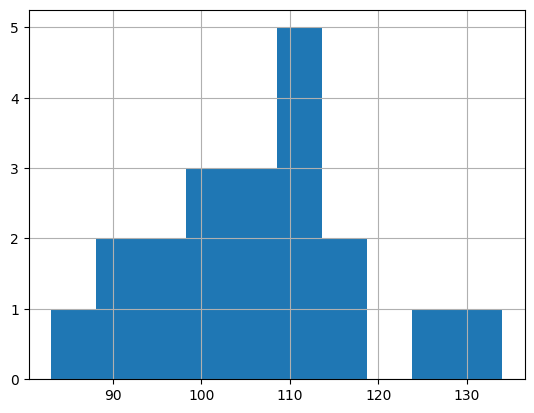

In [21]:
new_runtime_average['runtime'].hist(bins=10)